# Integrating Sphere Basics

**Scott Prahl**

**Dec 2021**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import iadpython.sphere
%config InlineBackend.figure_format='retina'


## Integrating spheres are used to collect all light

The interior surfaces are a matte white paint (in the past this was something very white like MgSO₄ or BaSO₄).  Any light entering the sphere will bounce around multiple times.  Each bounce diffuses the incident light and it does this until the light fall on the inside walls of the sphere is uniform everywhere.  A detector port can then be placed anywhere on the sphere to get a measure that scales with the total amount of light entering the sphere.

## Port areas

If we look at a cross-section of an integrating sphere used in to measure transmission (left) and reflection (right) then we can see the diameters of the sphere and each of the ports.

<center>
    <img src="sphere.png" width="50%" />
</center>

The natural thing would be to use subscripts and define the relative area of the sample as $a_\mathrm{sample}$. Relative area parameters are 

$$
a_\mathrm{sample} = \frac{\mbox{Area of sample port}}{\mbox{Surface area of integrating sphere}}
$$

Other relative areas are the area of the detector  $a_\mathrm{detector}$, the area of the entrance port $a_\mathrm{entrance}$, and the area of the sphere wall $a_\mathrm{wall}$

The total sphere surface includes the sphere has wall and ports (sample, detector, and entrance).  Thus

$$
A_\mathrm{total} = A_\mathrm{wall} + A_\mathrm{sample} +  A_\mathrm{detector} +  A_\mathrm{entrance}
$$

or in terms of dimensionless relative areas 

$$
a_\mathrm{wall} = 1 -  a_\mathrm{sample} - a_\mathrm{detector} - a_\mathrm{entrance}
$$

One thing to note is that for the sphere on the left (the transmission experiment) the entrance port does not exist and therefore has zero area.  The fraction of the sphere walls that is covered by ports is greater in the experiment on the left than the one on the right.  Thus the relative wall area $a_\mathrm{wall}$ for the two experiments will be different.

### Spherical caps

The ports consist of holes in the sphere created by a plane passing through the edge of the sphere.  This means that the area of the disk $\pi a^2$ differs slightly from the area of the subtended surface area of sphere that was removed.  This section is for those who worry about such things.

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Spherical_cap_diagram.tiff/lossless-page1-597px-Spherical_cap_diagram.tiff.png" width="15%"/>
</center>

Note that a port with radius $a$ has a cap area on a sphere with radius $r$

$$
A_\mathrm{cap} = 2\pi r h
$$
where $h$ is the height of the cap
$$
h = r - \sqrt{r^2-a^2}
$$

The relative area is then

$$
a_\mathrm{cap} = \frac{2\pi r h}{4\pi r^2} = \frac{r - \sqrt{r^2-a^2}}{2r} \approx \frac{a^2}{4r^2} - \frac{a^4}{16r^4} + \cdots
$$

This can be compared directly with the normalized area of a disk divided by the surface area of the sphere:

$$
a_\mathrm{cap}' = \frac{\pi a^2}{4\pi r^2} = \frac{a^2}{4r^2}  = \frac{d_\mathrm{cap}^2}{4d_\mathrm{sphere}^2}
$$

This is a tiny change from the naive approach; since $a_\mathrm{cap}<0.01$ typically, the cap area error will be less than 1%.


## Super simple sphere model: No reflection from ports

The simplest thing is to assume that the ports completely absorb any light that falls on them.  This is not a terrible assumption: the empty port definitely has no reflection, the detector should absorb nearly all the light, and the sample will typically have much less reflection than the sphere walls.  

Consider optical power $r_0 P_0$ (or $t_0 P_0$) entering the sphere.  The total power hitting the wall on the first incidence is

$$
\mbox{first incident power on wall} = P_0 r_0 a_\mathrm{wall}
$$

The light that is reflected from the first incidence constitutes the second incidence

$$
\mbox{second incident power on wall} = (P_0 r_0 a_\mathrm{wall}) \times (r_\mathrm{wall} a_\mathrm{wall})
$$

this light will then be reflected again and the light hitting all walls for the second bounce will be

$$
\mbox{third incident power on wall} = (P_0 r_0 a_\mathrm{wall}) \times (r_\mathrm{wall} a_\mathrm{wall}) \times (r_\mathrm{wall} a_\mathrm{wall})
$$

The total power on the walls will be

$$
P_\mathrm{wall} = \mbox{(first power)}  + \mbox{(second power)} + \cdots
$$

or

$$
P_\mathrm{wall} = P_0 r_0 a_\mathrm{wall} (1 + (r_\mathrm{wall}a_\mathrm{wall}) + (r_\mathrm{wall}a_\mathrm{wall})^2 + \cdots) = \frac{r_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}} P_0
$$

This suggests introducing a sphere multiplier $M$ defined as

$$
M = \frac{P_\mathrm{wall}}{P_0} = \frac{r_0 a_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}}
$$

This differs from equation 14 found in LabSphere's "Technical Guide: integrating Sphere Theory and application" because they assume a collimated beam hits the wall to generate a first incident power of $P_0 r_\mathrm{wall}$).
        
For a reflectance measurement, then 
$$
M =  \frac{\mathrm{UR1}\cdot a_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}} \qquad\qquad \mbox{multiplier for reflection experiment}
$$

For a reflectance measurement, then 
$$
M =  \frac{\mathrm{UT1}\cdot a_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}} \qquad\qquad \mbox{multiplier for transmission experiment}
$$


### Sphere wall radiance multiplier for different port areas

There 10-50X more light on any part of the sphere wall than you would get if you just took the light entering the sphere and divided by the surface area of the walls.  Here we see the how the two light loss mechanisms (port size and wall reflectance) affect this multipler.

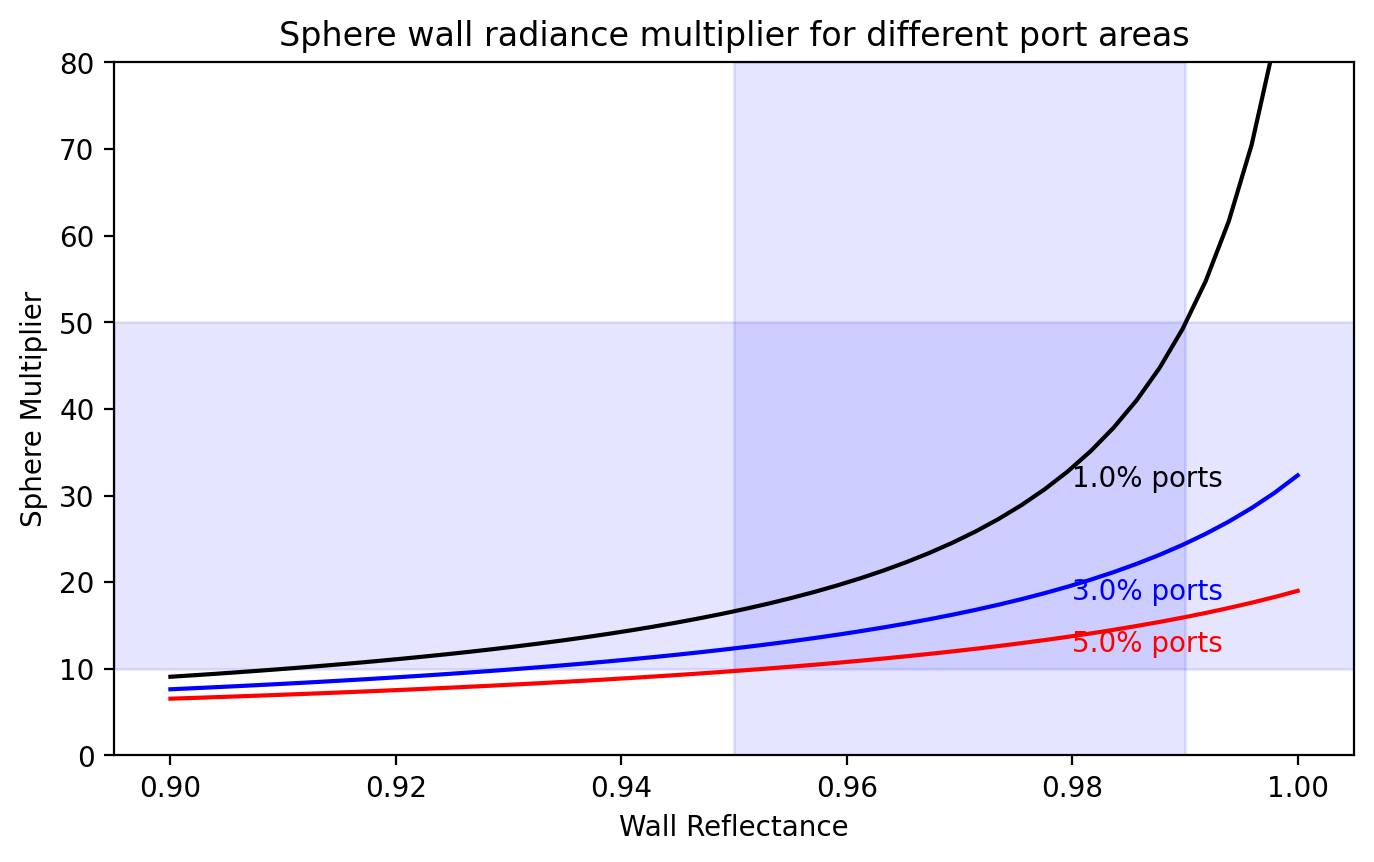

In [2]:
sphere_diameter = 250
s = iadpython.sphere.Sphere(sphere_diameter, 1)
s.r_wall = np.linspace(0.9,1,50)

plt.figure(figsize=(8,4.5))

s.a_wall = 0.99
plt.plot(s.r_wall, s.multiplier(UX1=1, URU=0), color='black')
plt.text(0.98, 31, '%.1f%% ports'%(100-100*s.a_wall),color='black')

s.a_wall = 0.97
plt.plot(s.r_wall, s.multiplier(UX1=1, URU=0), color='blue')
plt.text(0.98, 18, '%.1f%% ports'%(100-100*s.a_wall),color='blue')

s.a_wall = 0.95
plt.plot(s.r_wall, s.multiplier(UX1=1, URU=0), color='red')
plt.text(0.98, 12, '%.1f%% ports'%(100-100*s.a_wall),color='red')

plt.xlabel('Wall Reflectance')
plt.ylabel('Sphere Multiplier')
plt.ylim(0,80)

plt.axvspan(0.95,0.99,color='blue',alpha=0.1)
plt.axhspan(10,50,color='blue',alpha=0.1)

plt.title("Sphere wall radiance multiplier for different port areas")

plt.show()

### Cumulative effect of multiple sphere bounces on wall radiance

Each bounce contributes a little more.  Highly reflective spheres with small port areas will bounce around hundreds of times before reaching a steady state radiance on the wall.

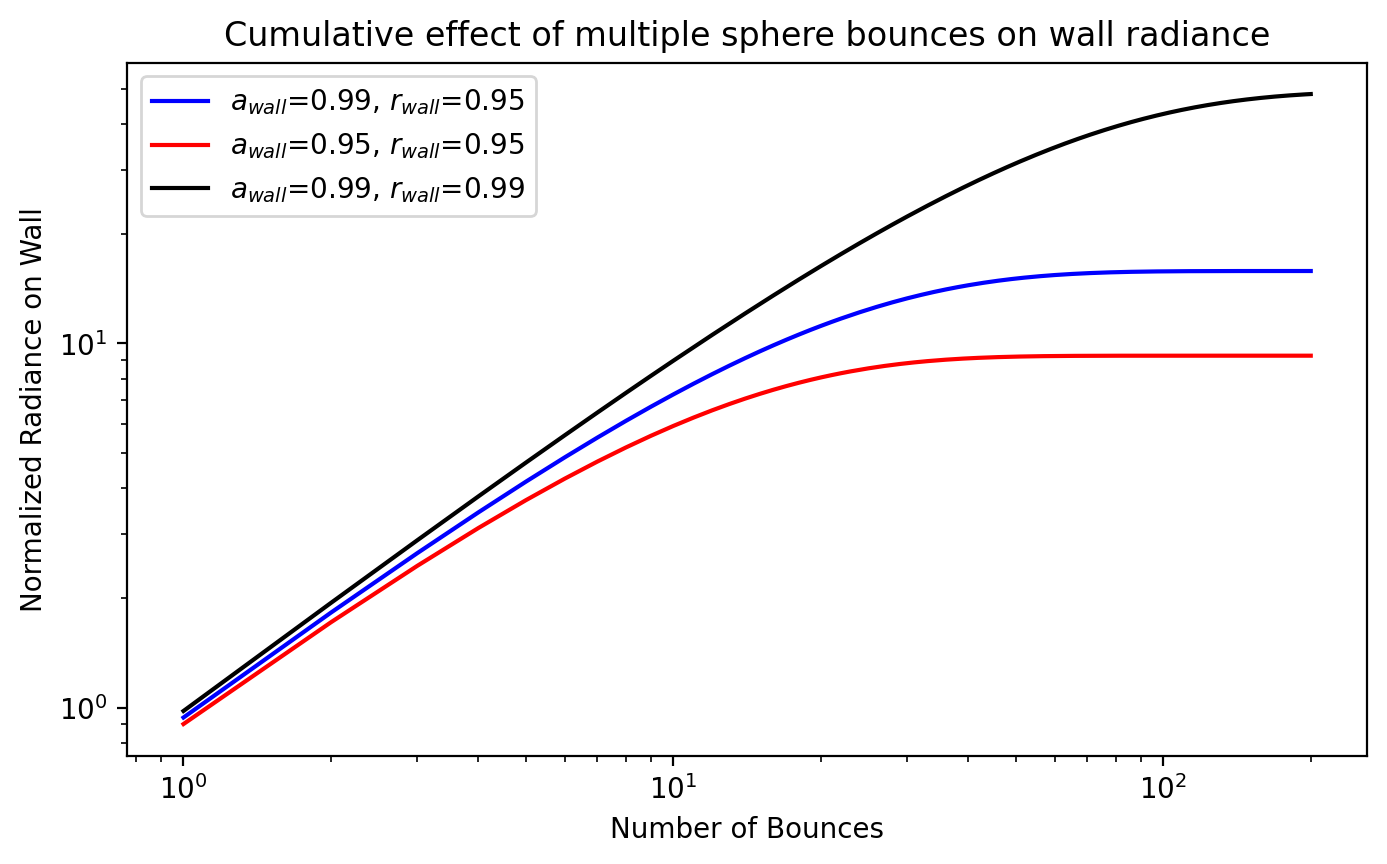

In [3]:
bounces = np.linspace(1,200,200)
plt.figure(figsize=(8,4.5))

a_wall = 0.99
r_wall = 0.95
r_cum = np.cumsum((r_wall*a_wall)**bounces)
label = '$a_{wall}$=%.2f, $r_{wall}$=%.2f'%(a_wall,r_wall)
plt.loglog(bounces, r_cum, 'b', label=label)

a_wall = 0.95
r_wall = 0.95
r_cum = np.cumsum((r_wall*a_wall)**bounces)
label = '$a_{wall}$=%.2f, $r_{wall}$=%.2f'%(a_wall,r_wall)
plt.loglog(bounces, r_cum, 'r', label=label)

a_wall = 0.99
r_wall = 0.99
r_cum = np.cumsum((r_wall*a_wall)**bounces)
label = '$a_{wall}$=%.2f, $r_{wall}$=%.2f'%(a_wall,r_wall)
plt.loglog(bounces, r_cum, 'k', label=label)

plt.legend()
plt.xlabel('Number of Bounces')
plt.ylabel('Normalized Radiance on Wall')
plt.title('Cumulative effect of multiple sphere bounces on wall radiance')
plt.show()

### Wall radiance relative to perfectly white 250mm sphere

This is another graph showing the non-linear relationship between the wall radiance and the reflectivity of the sphere walls.

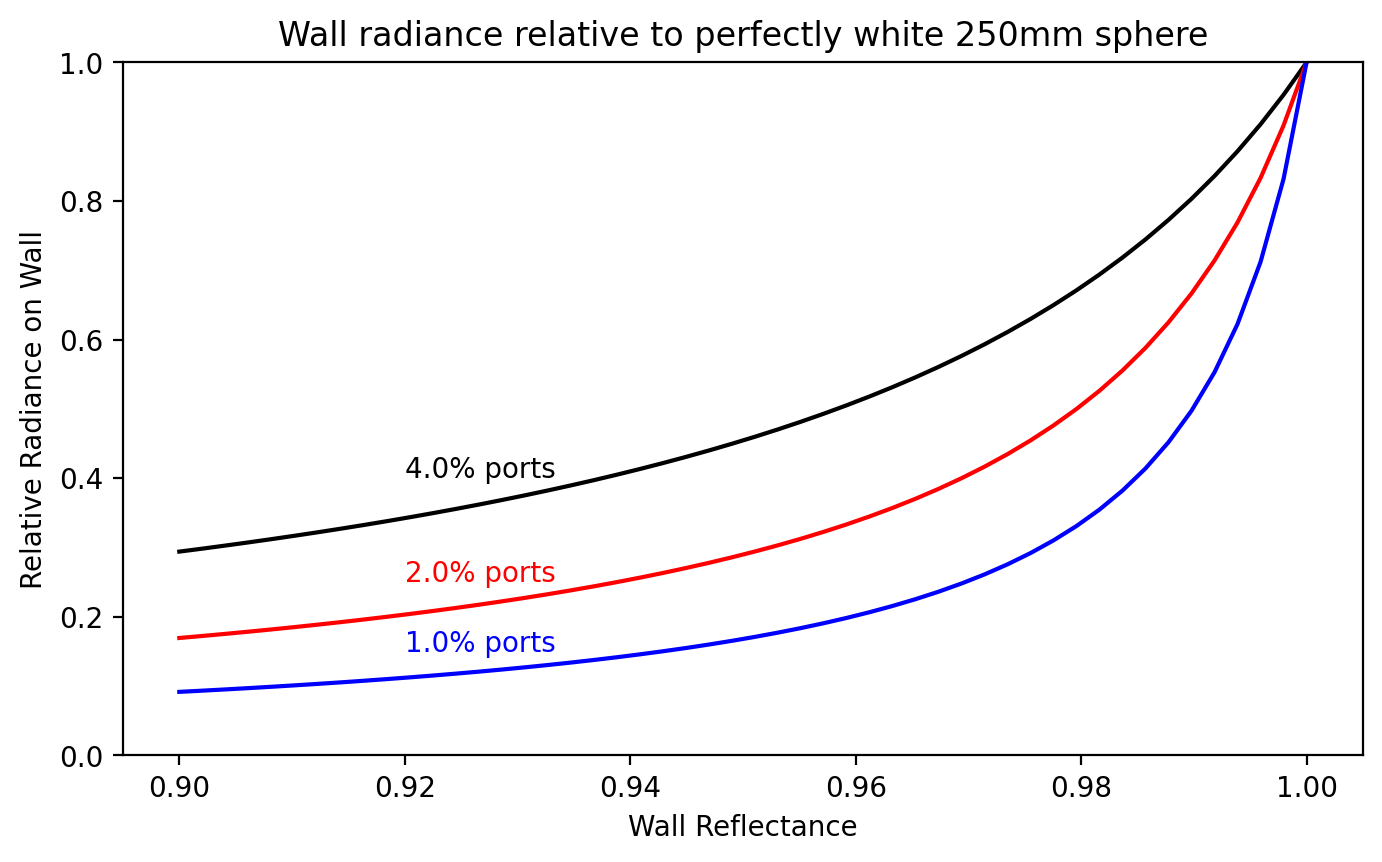

In [4]:
r_wall = np.linspace(0.9,1,50)
s = iadpython.sphere.Sphere(250, 1)
s.r_wall = np.linspace(0.9,1,50)
plt.figure(figsize=(8,4.5))

s.a_wall = 0.96
M = s.multiplier(UX1=1, URU=0)
plt.plot(r_wall, M/np.max(M),color='black')
plt.text(0.92, 0.4, '%.1f%% ports'%(100-100*s.a_wall),color='black')

s.a_wall = 0.98
M = s.multiplier(UX1=1, URU=0)
plt.plot(r_wall, M/np.max(M),color='red')
plt.text(0.92, 0.25, '%.1f%% ports'%(100-100*s.a_wall),color='red')

s.a_wall = 0.99
M = s.multiplier(UX1=1, URU=0)
plt.plot(r_wall, M/np.max(M),color='blue')
plt.text(0.92, 0.15, '%.1f%% ports'%(100-100*s.a_wall),color='blue')

plt.xlabel('Wall Reflectance')
plt.ylabel('Relative Radiance on Wall')
plt.ylim(0,1)
plt.title('Wall radiance relative to perfectly white 250mm sphere')

plt.show()